In [305]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [306]:
df_train=pd.read_csv("train.csv")
df_train.sample(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
1861,1861,37,1017.7,17.1,16.1,15.6,15.5,95.0,93.0,0.0,40.0,14.5,1
1615,1615,156,1006.5,34.8,30.0,26.3,24.3,60.0,38.0,11.4,220.0,9.2,0
1883,1883,59,1012.0,25.2,21.3,20.2,19.9,79.0,88.0,2.0,80.0,26.8,1
601,601,237,1006.7,31.0,28.1,26.5,25.0,80.0,88.0,0.6,230.0,40.0,1
739,739,10,1014.5,16.3,14.7,11.8,11.6,87.0,100.0,0.0,20.0,29.8,1
1838,1838,14,1024.3,17.4,12.9,10.9,8.1,77.0,93.0,0.0,20.0,26.8,1
1939,1939,115,1011.4,25.2,23.1,21.0,20.9,79.0,79.0,3.1,40.0,26.5,0
130,130,131,1008.7,31.4,28.2,26.1,25.1,82.0,75.0,9.1,120.0,21.8,0
963,963,234,1005.7,28.9,26.0,24.8,23.0,73.0,44.0,9.8,20.0,20.5,0
1509,1509,50,1017.8,17.4,16.0,15.0,15.5,86.0,79.0,0.1,60.0,12.5,1


In [307]:
X = df_train.drop(columns="rainfall")
y = df_train["rainfall"]

In [308]:
transformer = make_pipeline(
    SimpleImputer(strategy="constant"),
    StandardScaler(),
)

In [309]:
preprocessor = make_column_transformer(
    (transformer, X.columns)
)

In [310]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [311]:
input_shape = [X_train.shape[1]]
input_shape

[12]

In [312]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu',input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid')
]
    
)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [313]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"])

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - binary_accuracy: 0.5746 - loss: 0.8242 - val_binary_accuracy: 0.7810 - val_loss: 0.6026
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - binary_accuracy: 0.7568 - loss: 0.6219 - val_binary_accuracy: 0.8157 - val_loss: 0.5743
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - binary_accuracy: 0.8086 - loss: 0.5471 - val_binary_accuracy: 0.8266 - val_loss: 0.5698
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - binary_accuracy: 0.8191 - loss: 0.5285 - val_binary_accuracy: 0.8449 - val_loss: 0.5741
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - binary_accuracy: 0.8320 - loss: 0.4793 - val_binary_accuracy: 0.8467 - val_loss: 0.5722
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - binary_accuracy: 0.8483 - loss: 0.4343 - val_binary_accuracy: 0.8394 - val_loss: 0.5582
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - binary_accuracy: 0.8537 - loss: 0.4410 - val_binary_accuracy: 0.8376 - val_loss: 0.5407
Epoch 8/200
4/4 ━━━

<Axes: title={'center': 'Accuracy'}>

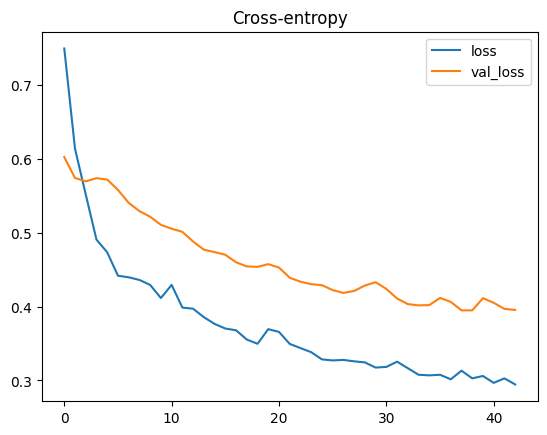

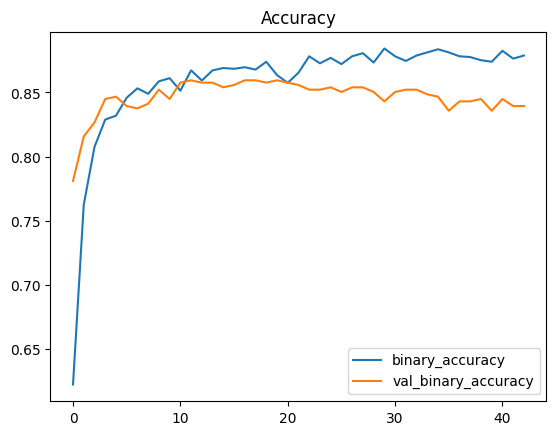

In [314]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [315]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8644 - loss: 0.3645 - val_binary_accuracy: 0.8595 - val_loss: 0.3927
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8574 - loss: 0.3392 - val_binary_accuracy: 0.8303 - val_loss: 0.3864
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8530 - loss: 0.3636 - val_binary_accuracy: 0.8358 - val_loss: 0.3694
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8553 - loss: 0.3350 - val_binary_accuracy: 0.8412 - val_loss: 0.3774
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8568 - loss: 0.3594 - val_binary_accuracy: 0.8394 - val_loss: 0.3887
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8700 - loss: 0.3195 - val_binary_accuracy: 0.8467 - val_loss: 0.3738
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.8661 - loss: 0.3191 - val_binary_accuracy: 0.8358 - val_loss: 0.3866
Epoch 8/10
52/52 ━━━

In [316]:
loss, accuracy = model.evaluate(X_valid, y_valid)
print(f"Loss: {loss}, Accuracy: {accuracy}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8542 - loss: 0.3712 
Loss: 0.39813417196273804, Accuracy: 0.8339415788650513


In [317]:
y_pred=model.predict(X_valid)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [318]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix,log_loss

In [319]:
roc_auc_score(y_valid,y_pred)


np.float64(0.8616805667653125)

In [320]:
with open("Binary_pred_rainfall_dataset.pkl","wb") as file:
    pickle.dump((model,preprocessor),file)

In [321]:
df_test=pd.read_csv('test.csv')
df_test = preprocessor.transform(df_test)

In [322]:
test_pred=model.predict(df_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [323]:
model_submission=pd.read_csv("sample_submission.csv",index_col="id")
model_submission["rainfall"]=test_pred
model_submission

,rainfall
id,
2190,0.998740
2191,0.999128
2192,0.998344
2193,0.195180
2194,0.006695
...,...
2915,0.999881
2916,0.990232
2917,0.999640


In [324]:
model_submission.to_csv("dl_submission.csv")